# 다중 분류(Multiclass Classification) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**다중 분류**(Multiclass Classification)

**KNN**(K-Nearest Neighbor, K-최근접 이웃)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

### 데이터 준비

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/iris.csv
To: /content/iris.csv
5.11kB [00:00, 5.15MB/s]       


### 데이터 전처리 함수

In [ ]:
def get_iris(mode=None):
    # 데이터 읽기
    iris = pd.read_csv('iris.csv')

    # 필요없는 컬럼 제거
    df = iris.drop(['Id'], axis=1).copy()

    # 컬럼명 변경
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

    # 이진 데이터
    if (mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
  
    # 인코딩
    df['species'] = df['species'].map({'Iris-setosa': 0, 
                                       'Iris-versicolor': 1, 
                                       'Iris-virginica': 2})

    # X, y 나누기
    X = df.drop(['species'], axis=1)
    y = df['species']

    # train, test 나누기
    X, y = shuffle(X, y, random_state=42)
    num = int(len(X)*0.8)
    X_train = X.iloc[:num,]
    X_test = X.iloc[num:,]
    y_train = y.iloc[:num]
    y_test = y.iloc[num:]

    # 데이터 표준화하기
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu) / std
        X_test[col] = (X_test[col] - mu) / std
  
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_iris()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
# numpy.ndarray으로 변경
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scores = []

for i in range(3, 30):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  scores.append(score)

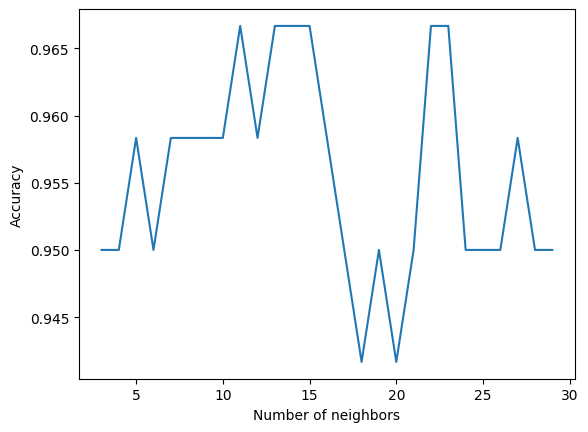

In [ ]:
plt.plot(range(3, 30), scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- **Best Performance**: k=5

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 예측

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 2])

- **성능 평가**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)
    rec = recall_score(y_true, y_pred, average=average)

    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [ ]:
# 다중 분류: average='macro'
print_score(y_test, y_pred, average='macro')

accuracy: 0.9666666666666667
precision: 0.9722222222222222
recall: 0.9722222222222222
